# Análisis Exploratorio

## Librerías

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import missingno as msno
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

## Bases de datos

In [4]:
# Importing Databases
df= pd.read_csv("/Users/manuelrodriguez/Documents/Proyectos/ML_Models/Data/iar_Reservaciones.csv")

In [5]:
# Visualizing the database
print("BASE DE DATOS DE RESERVACIONES")
print("==============================")
df.head()

BASE DE DATOS DE RESERVACIONES


,ID_Reserva,Fecha_hoy,h_res_fec,h_res_fec_ok,h_res_fec_okt,h_num_per,aa_h_num_per,h_num_adu,aa_h_num_adu,h_num_men,...,h_edo,h_codigop,h_correo_e,h_nom,h_tfa_total,aa_h_tfa_total,moneda_cve,h_ult_cam_fec,h_ult_cam_fec_ok,h_ult_cam_fec_okt
0,0,2019-08-16 00:00:00.000,20190816,2019-08-16,2019-08-16 00:00:00.000,2,0,2,0,0,...,EMX,01500,NaN,NaN,2659.98,0.0,1,20191110,2019-11-10,2019-11-10 00:00:00.000
1,1,2019-10-22 00:00:00.000,20191022,2019-10-22,2019-10-22 00:00:00.000,4,0,4,0,0,...,EGT,023541,NaN,NaN,1764.00,0.0,1,20191205,2019-12-05,2019-12-05 00:00:00.000
2,2,2019-10-28 00:00:00.000,20191028,2019-10-28,2019-10-28 00:00:00.000,2,0,2,0,0,...,EMC,59800,NaN,NaN,2660.04,0.0,1,20191205,2019-12-05,2019-12-05 00:00:00.000
3,3,2019-10-28 00:00:00.000,20191028,2019-10-28,2019-10-28 00:00:00.000,4,0,3,0,0,...,EGT,37219,NaN,NaN,1995.03,0.0,1,20191211,2019-12-11,2019-12-11 00:00:00.000
4,4,2019-10-28 00:00:00.000,20191028,2019-10-28,2019-10-28 00:00:00.000,2,0,2,0,0,...,EMX,15300,NaN,NaN,13369.92,0.0,1,20191212,2019-12-12,2019-12-12 00:00:00.000


In [6]:
# Diccionario de columnas basado en el Excel "Matriz de Trazabilidad y tablas fuente"
columnas_diccionario = [
    'Descripcion',               # REGIÓN
    'Marca',                     # MARCA 
    'Franquicia',                # TIPO
    'Agencia_nombre',            # CLIENTE 
    'moneda',                    # MONEDA
    'h_fec_sda_okt',             # FECHA
    'Canal_nombre',              # CANAL
    'Empresa_nombre',            # HOTEL
    'h_nom',                     # RESERVACIÓN
    'estatus_reservaciones',     # ESTATUS DE LA RESERVACION
    'h_cod_reserva',             # N° DE CONFIRMACIÓN
    'h_fec_sda_ok',              # FECHA CONFIRMACIÓN (Dormidas)
    'h_ult_cam_fec_ok',          # FECHA CONFIRMACIÓN (Pick-Up)
    'h_edo',                     # ESTADO
    'h_codigop',                 # CÓDIGO POSTAL
    'h_fec_lld',                 # FECHA LLEGADA
    'h_fec_sda',                 # FECHA SALIDA
    'Agencia_cve',               # CLIENTE CODIGO
    'h_num_noc',                 # CUARTOS NOCHE
    'h_tot_hab',                 # HABITACIONES
    'h_tfa_total',               # INGRESOS POR HABITACIÓN
    'h_correo_e'                 # CORREO ELECTRÓNICO
]

In [7]:
# Match de columnas del diccionario y del dataframe
columnas_presentes = [col for col in columnas_diccionario if col in df.columns]
print(f"Columnas encontradas en el dataframe: {len(columnas_presentes)} de {len(columnas_diccionario)}")


Columnas encontradas en el dataframe: 13 de 22


In [8]:
# Mantener ID de columnas
columnas_id = [col for col in df.columns if "ID" in col.upper()]
print(f"Columnas ID: {len(columnas_id)}")

Columnas ID: 10


In [9]:
# Unicamente trabajar con las columnas que sí tienen un significado en el diccionario
columnas_a_usar = list(set(columnas_presentes + columnas_id))
df_analisis = df[columnas_a_usar]

In [10]:
for col in columnas_id:
    # Primero verificamos si la columna es numérica
    if pd.api.types.is_numeric_dtype(df_analisis[col]):
        # Si es numérica, la convertimos a string y luego a object
        df_analisis[col] = df_analisis[col].astype(str)
    # Aseguramos que sea tipo object
    df_analisis[col] = df_analisis[col].astype('object')
    print(f"Columna {col} convertida a tipo object")

Columna ID_Reserva convertida a tipo object
Columna ID_Programa convertida a tipo object
Columna ID_Paquete convertida a tipo object
Columna ID_Segmento_Comp convertida a tipo object
Columna ID_Agencia convertida a tipo object
Columna ID_empresa convertida a tipo object
Columna ID_Tipo_Habitacion convertida a tipo object
Columna ID_canal convertida a tipo object
Columna ID_Pais_Origen convertida a tipo object
Columna ID_estatus_reservaciones convertida a tipo object


In [11]:
# Columnas numericas
columnas_numericas = ['h_num_noc', 'h_tot_hab', 'h_tfa_total']
for col in columnas_numericas:
    if col in df_analisis.columns:
        try:
            # Intentamos convertir a float (maneja valores decimales si existen)
            df_analisis[col] = pd.to_numeric(df_analisis[col], errors='coerce')
            # Rellenamos valores nulos que pudieran surgir de la conversión
            if df_analisis[col].isna().any():
                print(f"Advertencia: Se encontraron valores no numéricos en {col} que se convirtieron a NaN")
            print(f"Columna {col} convertida a tipo numérico")
        except Exception as e:
            print(f"Error al convertir {col} a numérico: {e}")

Columna h_num_noc convertida a tipo numérico
Columna h_tot_hab convertida a tipo numérico
Columna h_tfa_total convertida a tipo numérico


In [12]:
# Valores nulos
print("\nVALORES NULOS EXISTENTES")
print("===========================")
for columna in df_analisis.columns:
    if df_analisis[columna].isnull().sum() > 0:
        print(f"{columna}: {df_analisis[columna].isnull().sum()} valores nulos")
print("===========================")
print("Total de filas:", df_analisis.shape[0])




VALORES NULOS EXISTENTES
h_nom: 203002 valores nulos
h_correo_e: 203002 valores nulos
Total de filas: 203002


In [13]:
# Valores duplicados
print("\nCantidad de filas duplicadas:", df_analisis.duplicated().sum())


Cantidad de filas duplicadas: 0


In [14]:
columnas_con_nulos = df_analisis.columns[df_analisis.isna().any()].tolist()
print(f"\nColumnas con valores nulos: {len(columnas_con_nulos)}")
for col in columnas_con_nulos:
    null_count = df_analisis[col].isna().sum()
    null_percentage = (null_count / len(df_analisis)) * 100
    print(f"  - {col}: {null_count} valores nulos ({null_percentage:.2f}%)")

if columnas_con_nulos:
    df_analisis = df_analisis.drop(columns=columnas_con_nulos)
    print(f"\nSe eliminaron {len(columnas_con_nulos)} columnas con valores nulos.")
else:
    print("\nNo se encontraron columnas con valores nulos para eliminar.")

print(f"Total de columnas después de eliminar columnas nulas: {df_analisis.shape[1]}")



Columnas con valores nulos: 2
  - h_nom: 203002 valores nulos (100.00%)
  - h_correo_e: 203002 valores nulos (100.00%)

Se eliminaron 2 columnas con valores nulos.
Total de columnas después de eliminar columnas nulas: 21


# Exploración

In [15]:
# Dimensiones
print("DIMENSIONES")
print("===========")
print("(filas, columnas):", df_analisis.shape)

DIMENSIONES
(filas, columnas): (203002, 21)


In [16]:
# Tipos de datos
print("\nTIPOS DE DATOS")
print("=================")
print(df_analisis.dtypes)


TIPOS DE DATOS
h_ult_cam_fec_ok             object
ID_Paquete                   object
h_tfa_total                 float64
h_cod_reserva                object
h_codigop                    object
ID_Agencia                   object
ID_estatus_reservaciones     object
ID_Segmento_Comp             object
ID_canal                     object
ID_Reserva                   object
h_fec_sda                    object
h_edo                        object
ID_empresa                   object
h_num_noc                     int64
h_fec_sda_okt                object
ID_Tipo_Habitacion           object
h_fec_sda_ok                 object
ID_Programa                  object
h_tot_hab                     int64
h_fec_lld                    object
ID_Pais_Origen               object
dtype: object


In [17]:
# Separacion por tipos de datos
columnas_object = df_analisis.select_dtypes(include=['object']).columns.tolist()
columnas_numericas_reales = df_analisis.select_dtypes(include=['int64', 'float64']).columns.tolist()
columnas_datetime = df_analisis.select_dtypes(include=['datetime64']).columns.tolist()

print("TIPOS DE DATOS")
print("===============")
print(f"\nColumnas categóricas (object): {len(columnas_object)}")
print(f"Columnas numéricas: {len(columnas_numericas_reales)}")
print(f"Columnas de fecha: {len(columnas_datetime)}")

TIPOS DE DATOS

Columnas categóricas (object): 18
Columnas numéricas: 3
Columnas de fecha: 0


In [18]:
# Estadísticas básicas
print("\nRESUMEN ESTADISTICO")
print("======================")
df_analisis.describe()


RESUMEN ESTADISTICO


,h_tfa_total,h_num_noc,h_tot_hab
count,2.030020e+05,203002.000000,203002.000000
mean,4.106728e+03,1.680028,0.505581
std,6.501707e+03,2.866189,0.508751
min,-3.091000e+04,0.000000,0.000000
25%,0.000000e+00,0.000000,0.000000
50%,0.000000e+00,1.000000,1.000000
75%,7.592000e+03,3.000000,1.000000
max,1.033056e+06,687.000000,6.000000


In [19]:
# Ver base de datos
df_analisis.head()

,h_ult_cam_fec_ok,ID_Paquete,h_tfa_total,h_cod_reserva,h_codigop,ID_Agencia,ID_estatus_reservaciones,ID_Segmento_Comp,ID_canal,ID_Reserva,...,h_edo,ID_empresa,h_num_noc,h_fec_sda_okt,ID_Tipo_Habitacion,h_fec_sda_ok,ID_Programa,h_tot_hab,h_fec_lld,ID_Pais_Origen
0,2019-11-10,1,2659.98,,01500,112,9,14,10,0,...,EMX,1,3,2019-11-10 00:00:00.000,25,2019-11-10,1,1,20191107,157
1,2019-12-05,2,1764.00,,023541,112,9,14,10,1,...,EGT,1,4,2019-12-05 00:00:00.000,25,2019-12-05,1,1,20191201,157
2,2019-12-05,1,2660.04,,59800,112,9,14,10,2,...,EMC,1,4,2019-12-05 00:00:00.000,23,2019-12-05,1,1,20191201,157
3,2019-12-11,2,1995.03,,37219,112,9,14,10,3,...,EGT,1,3,2019-12-11 00:00:00.000,24,2019-12-11,1,1,20191208,157
4,2019-12-12,1,13369.92,74101652-3_2394,15300,14,9,5,13,4,...,EMX,1,4,2019-12-12 00:00:00.000,4,2019-12-12,1,1,20191208,157


# Limpieza de datos

In [20]:
# Dimension del df
print("DIMENSIONES DEL DATAFRAME")
print("=========================")
print(f"Filas: {df_analisis.shape[0]}, Columnas: {df_analisis.shape[1]}")

DIMENSIONES DEL DATAFRAME
Filas: 203002, Columnas: 21


In [21]:
# Info del dataframe
print("INFORMACION DEL DATAFRAME")
print("=========================")
df_analisis.info()

INFORMACION DEL DATAFRAME
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 203002 entries, 0 to 203001
Data columns (total 21 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   h_ult_cam_fec_ok          203002 non-null  object 
 1   ID_Paquete                203002 non-null  object 
 2   h_tfa_total               203002 non-null  float64
 3   h_cod_reserva             203002 non-null  object 
 4   h_codigop                 203002 non-null  object 
 5   ID_Agencia                203002 non-null  object 
 6   ID_estatus_reservaciones  203002 non-null  object 
 7   ID_Segmento_Comp          203002 non-null  object 
 8   ID_canal                  203002 non-null  object 
 9   ID_Reserva                203002 non-null  object 
 10  h_fec_sda                 203002 non-null  object 
 11  h_edo                     203002 non-null  object 
 12  ID_empresa                203002 non-null  object 
 13  h_num_noc         

In [22]:
# Estadisticas descriptivas
print("ESTADISTICAS DESCRIPTIVAS")
print("==========================")
df_analisis.describe().T

ESTADISTICAS DESCRIPTIVAS


,count,mean,std,min,25%,50%,75%,max
h_tfa_total,203002.0,4106.728348,6501.707209,-30910.0,0.0,0.0,7592.0,1033056.0
h_num_noc,203002.0,1.680028,2.866189,0.0,0.0,1.0,3.0,687.0
h_tot_hab,203002.0,0.505581,0.508751,0.0,0.0,1.0,1.0,6.0


In [23]:
# Tipos de datos
df_analisis.dtypes.value_counts()

object     18
int64       2
float64     1
dtype: int64

In [24]:
# Conversion de fechas a datetime
columnas_fecha = [col for col in columnas_presentes if 'fec' in col.lower()]
for col in columnas_fecha:
    try:
        df_analisis[col] = pd.to_datetime(df_analisis[col], errors='coerce')
        print(f"Columna {col} convertida a datetime")
    except:
        print(f"No se pudo convertir la columna {col} a datetime")

Columna h_fec_sda_okt convertida a datetime
Columna h_fec_sda_ok convertida a datetime
Columna h_ult_cam_fec_ok convertida a datetime
Columna h_fec_lld convertida a datetime
Columna h_fec_sda convertida a datetime


In [25]:
df_analisis.head()

,h_ult_cam_fec_ok,ID_Paquete,h_tfa_total,h_cod_reserva,h_codigop,ID_Agencia,ID_estatus_reservaciones,ID_Segmento_Comp,ID_canal,ID_Reserva,...,h_edo,ID_empresa,h_num_noc,h_fec_sda_okt,ID_Tipo_Habitacion,h_fec_sda_ok,ID_Programa,h_tot_hab,h_fec_lld,ID_Pais_Origen
0,2019-11-10,1,2659.98,,01500,112,9,14,10,0,...,EMX,1,3,2019-11-10,25,2019-11-10,1,1,1970-01-01 00:00:00.020191107,157
1,2019-12-05,2,1764.00,,023541,112,9,14,10,1,...,EGT,1,4,2019-12-05,25,2019-12-05,1,1,1970-01-01 00:00:00.020191201,157
2,2019-12-05,1,2660.04,,59800,112,9,14,10,2,...,EMC,1,4,2019-12-05,23,2019-12-05,1,1,1970-01-01 00:00:00.020191201,157
3,2019-12-11,2,1995.03,,37219,112,9,14,10,3,...,EGT,1,3,2019-12-11,24,2019-12-11,1,1,1970-01-01 00:00:00.020191208,157
4,2019-12-12,1,13369.92,74101652-3_2394,15300,14,9,5,13,4,...,EMX,1,4,2019-12-12,4,2019-12-12,1,1,1970-01-01 00:00:00.020191208,157


# Análisis descriptivo

## Análisis de variables numéricas

In [26]:
# Estadísticas descriptivas
stats_numericas = df_analisis[columnas_numericas_reales].describe().T
stats_numericas['rango'] = stats_numericas['max'] - stats_numericas['min']
stats_numericas['coef_variacion'] = stats_numericas['std'] / stats_numericas['mean'] * 100
print(stats_numericas.round(2))

                count     mean      std      min  25%  50%     75%        max  \
h_tfa_total  203002.0  4106.73  6501.71 -30910.0  0.0  0.0  7592.0  1033056.0   
h_num_noc    203002.0     1.68     2.87      0.0  0.0  1.0     3.0      687.0   
h_tot_hab    203002.0     0.51     0.51      0.0  0.0  1.0     1.0        6.0   

                 rango  coef_variacion  
h_tfa_total  1063966.0          158.32  
h_num_noc        687.0          170.60  
h_tot_hab          6.0          100.63  


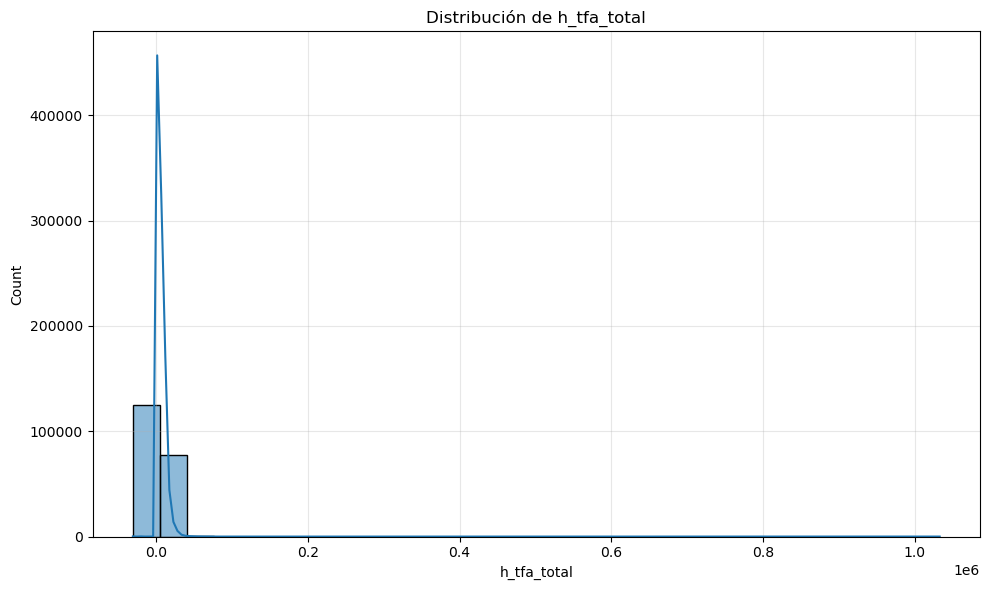

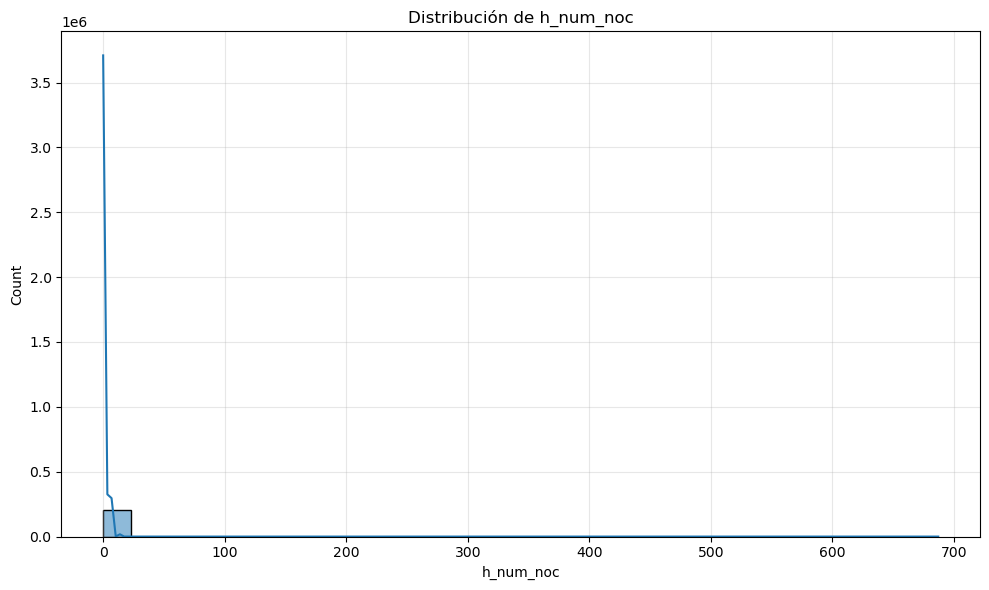

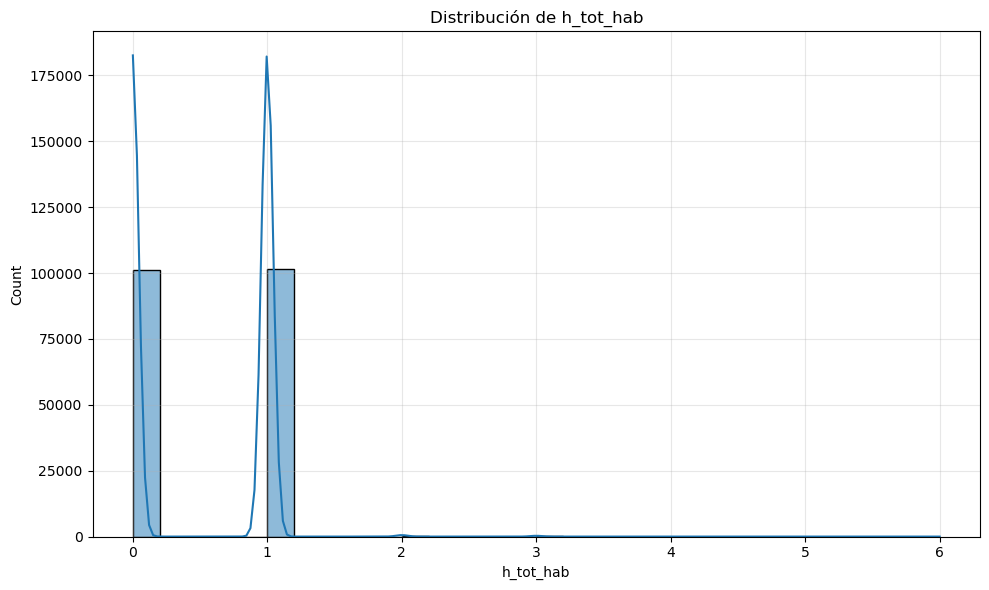

In [27]:
# Histogramas para variables numéricas
for col in columnas_numericas_reales:
    plt.figure(figsize=(10, 6))
    sns.histplot(df_analisis[col], kde=True, bins=30)
    plt.title(f'Distribución de {col}')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

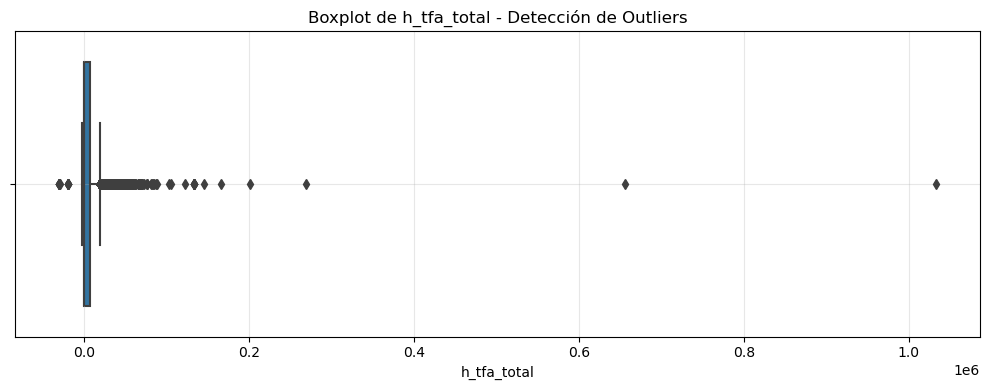

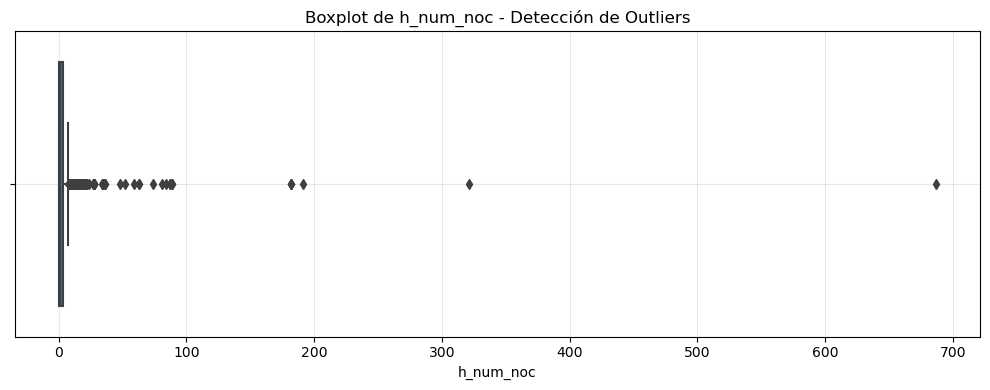

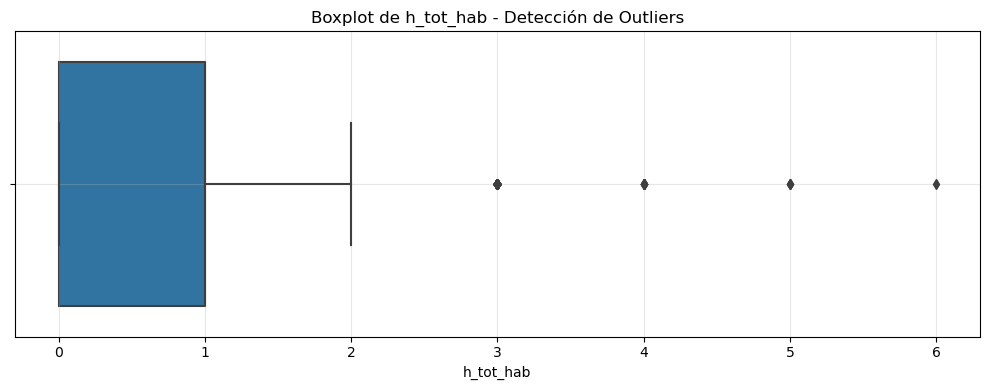

In [29]:
# Boxplot para detectar outliers
for col in columnas_numericas_reales:
    plt.figure(figsize=(10, 4))
    sns.boxplot(x=df_analisis[col])
    plt.title(f'Boxplot de {col} - Detección de Outliers')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

In [ ]:
# Estadísticas sobre outliers    
for col in columnas_numericas_reales:
    Q1 = df_analisis[col].quantile(0.25)
    Q3 = df_analisis[col].quantile(0.75)
    IQR = Q3 - Q1
    outlier_threshold_lower = Q1 - 1.5 * IQR
    outlier_threshold_upper = Q3 + 1.5 * IQR
    outliers = df_analisis[(df_analisis[col] < outlier_threshold_lower) | 
                            (df_analisis[col] > outlier_threshold_upper)][col]
    print(f"\nEstadísticas de {col}:")
    print(f"  - Rango: {df_analisis[col].min()} a {df_analisis[col].max()}")
    print(f"  - Media: {df_analisis[col].mean():.2f}")
    print(f"  - Mediana: {df_analisis[col].median():.2f}")
    print(f"  - Outliers detectados: {len(outliers)} ({len(outliers)/len(df_analisis)*100:.2f}%)")
    if len(outliers) > 0:
        print(f"  - Rango de outliers: {outliers.min():.2f} a {outliers.max():.2f}")


Estadísticas de h_tot_hab:
  - Rango: 0 a 6
  - Media: 0.51
  - Mediana: 1.00
  - Outliers detectados: 178 (0.09%)
  - Rango de outliers: 3.00 a 6.00

Estadísticas de h_num_noc:
  - Rango: 0 a 687
  - Media: 1.68
  - Mediana: 1.00
  - Outliers detectados: 1170 (0.58%)
  - Rango de outliers: 8.00 a 687.00

Estadísticas de h_tfa_total:
  - Rango: -30910.0 a 1033056.0
  - Media: 4106.73
  - Mediana: 0.00
  - Outliers detectados: 4415 (2.17%)
  - Rango de outliers: -30910.00 a 1033056.00


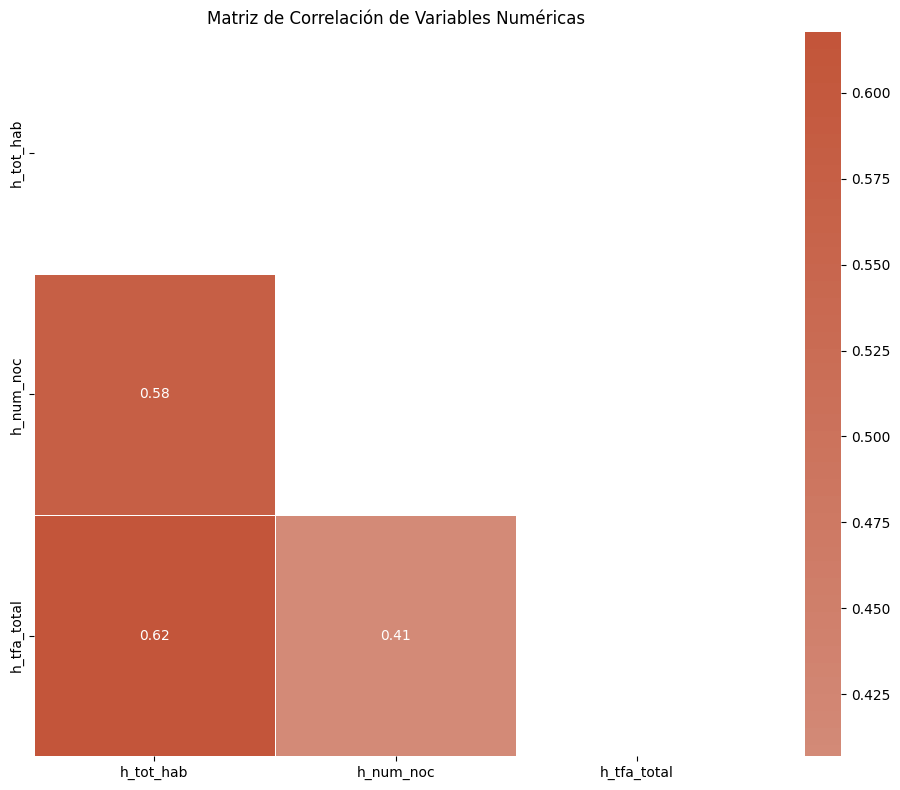

In [ ]:
# Correlación entre variables numéricas
corr_matrix = df_analisis[columnas_numericas_reales].corr()

plt.figure(figsize=(10, 8))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr_matrix, mask=mask, cmap=cmap, annot=True, fmt='.2f',
            linewidths=0.5, center=0, square=True)
plt.title('Matriz de Correlación de Variables Numéricas')
plt.tight_layout()
plt.show()

## Análisis de variables categóricas


Distribución de ID_Agencia:
  - Valores únicos: 120
  - Muchos valores únicos (120). Mostrando los 10 más frecuentes:
ID_Agencia
99     31553
112    25735
86     13031
14     12337
116     8846
33      7596
93      7160
89      6582
113     6337
32      4575
Name: count, dtype: int64


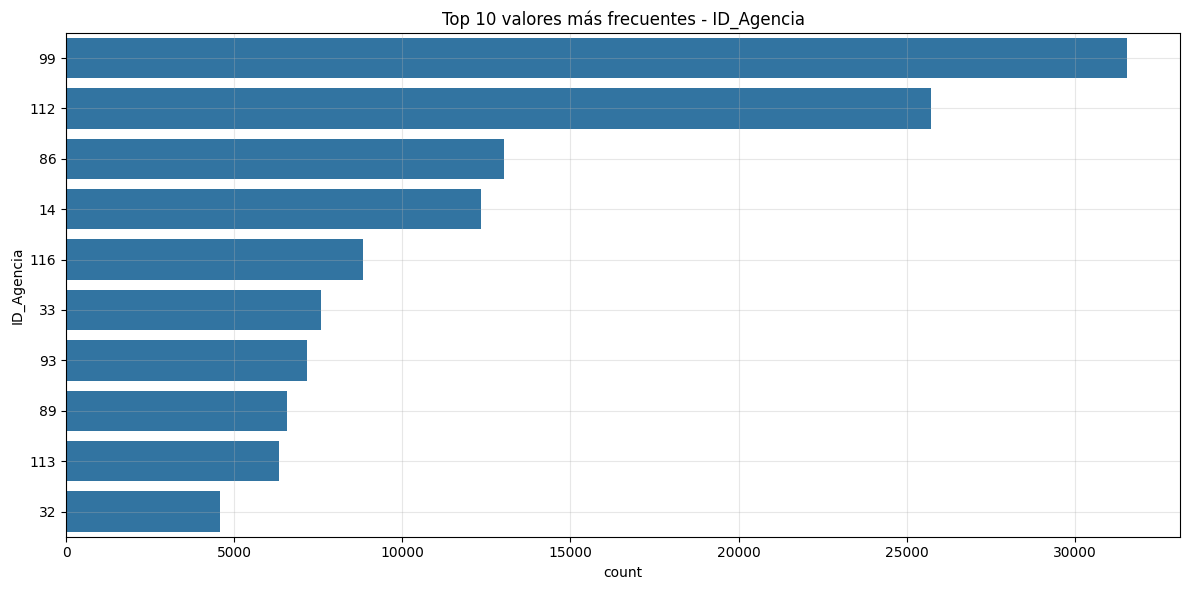


Distribución de ID_Programa:
  - Valores únicos: 2
  - Muchos valores únicos (2). Mostrando los 10 más frecuentes:
ID_Programa
1    202510
0       492
Name: count, dtype: int64


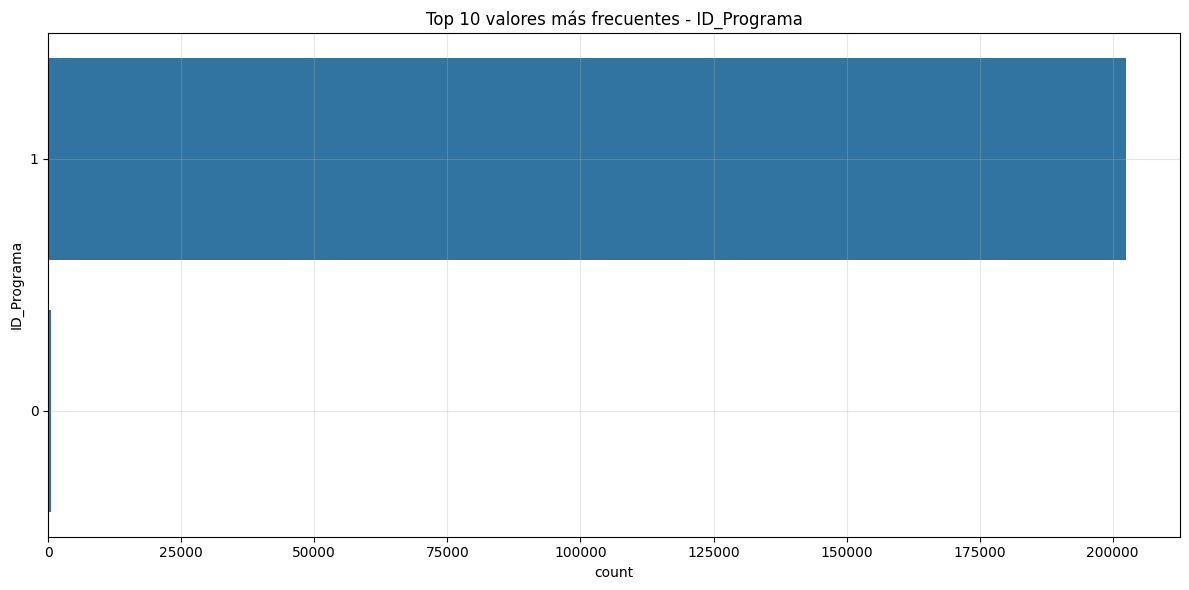


Distribución de ID_empresa:
  - Valores únicos: 1
  - Muchos valores únicos (1). Mostrando los 10 más frecuentes:
ID_empresa
1    203002
Name: count, dtype: int64


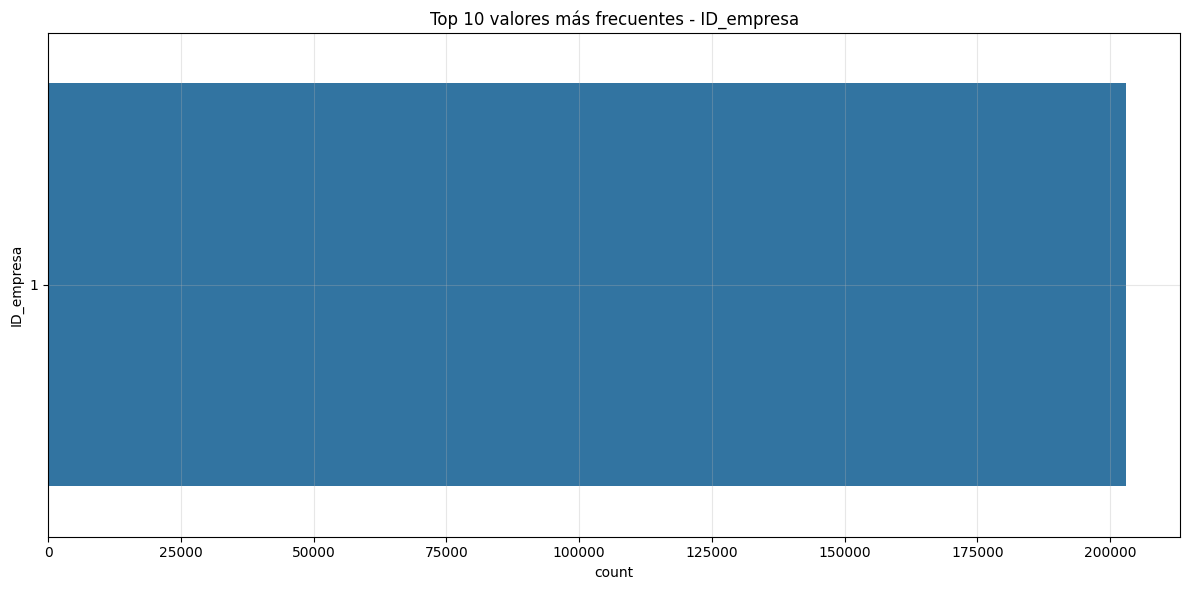


Distribución de ID_Pais_Origen:
  - Valores únicos: 4
  - Muchos valores únicos (4). Mostrando los 10 más frecuentes:
ID_Pais_Origen
157    201504
0         646
232       624
38        228
Name: count, dtype: int64


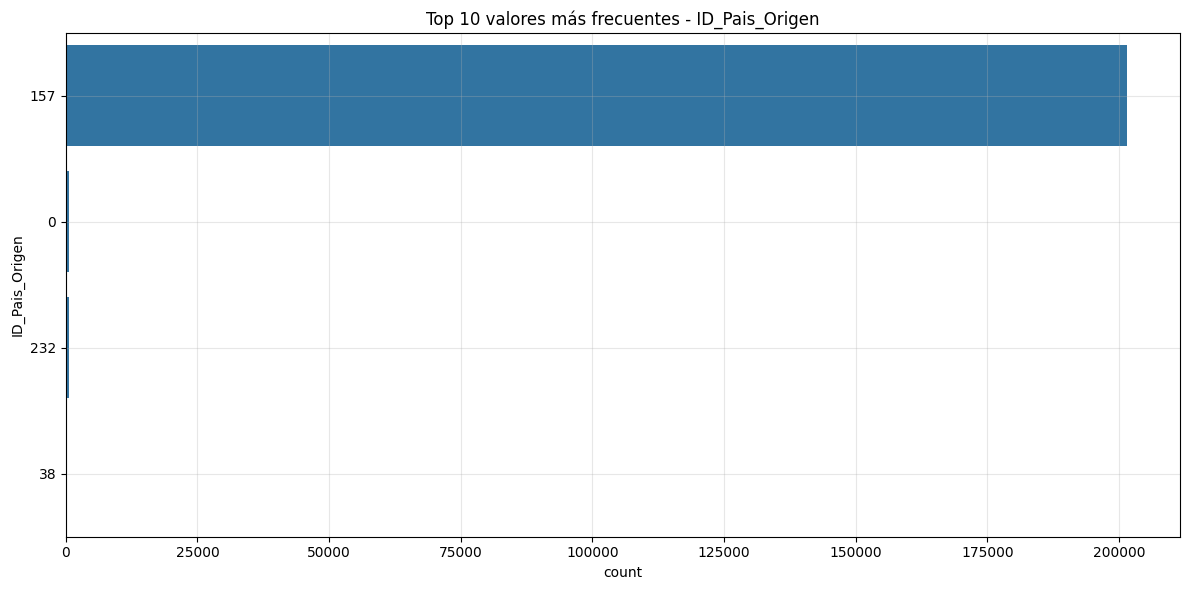


Distribución de ID_Paquete:
  - Valores únicos: 6
  - Muchos valores únicos (6). Mostrando los 10 más frecuentes:
ID_Paquete
1    117658
2     84718
0       492
5        92
3        40
4         2
Name: count, dtype: int64


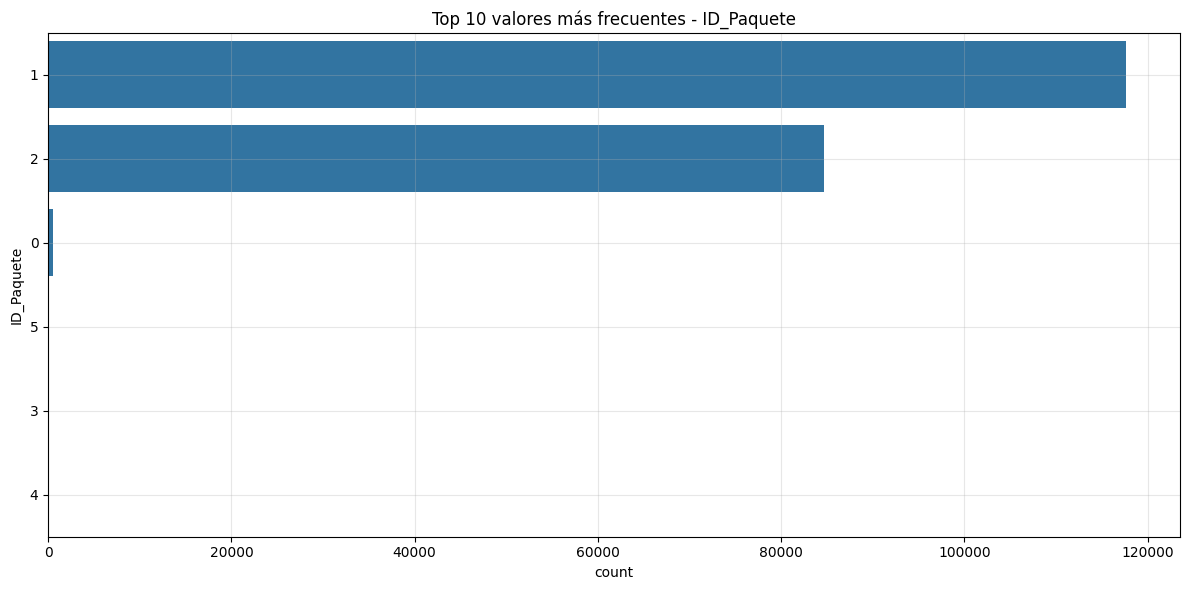


Distribución de ID_Reserva:
  - Valores únicos: 203002
  - Muchos valores únicos (203002). Mostrando los 10 más frecuentes:
ID_Reserva
0         1
135326    1
135328    1
135329    1
135330    1
135331    1
135332    1
135333    1
135334    1
135335    1
Name: count, dtype: int64


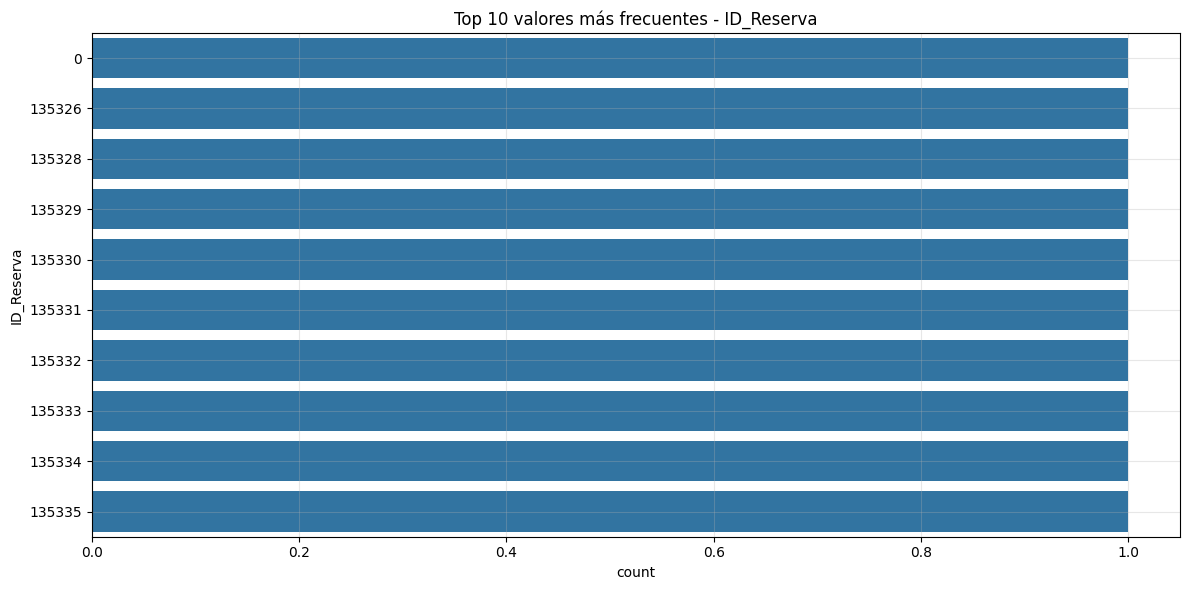


Distribución de ID_Segmento_Comp:
  - Valores únicos: 20
  - Muchos valores únicos (20). Mostrando los 10 más frecuentes:
ID_Segmento_Comp
17    73098
14    27298
5     26874
16    16872
12    15887
18     9082
1      6059
13     5770
8      5195
10     3212
Name: count, dtype: int64


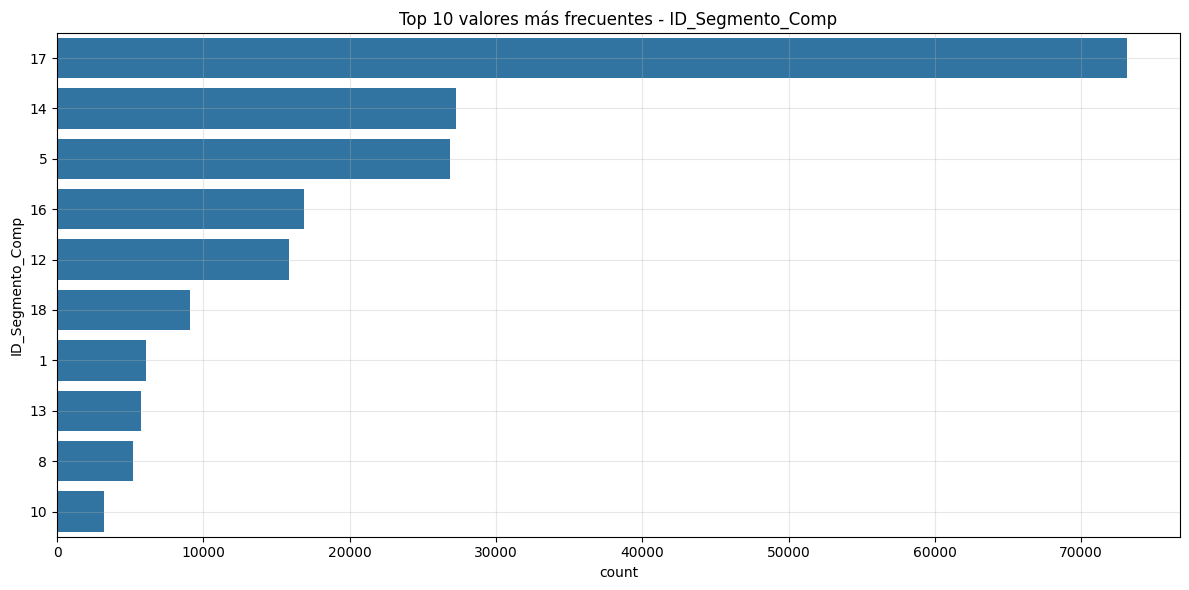


Distribución de ID_Tipo_Habitacion:
  - Valores únicos: 28
  - Muchos valores únicos (28). Mostrando los 10 más frecuentes:
ID_Tipo_Habitacion
4     52796
19    51281
17    30868
6     13910
25    11124
13    10510
5      6091
23     5793
26     4909
24     3849
Name: count, dtype: int64


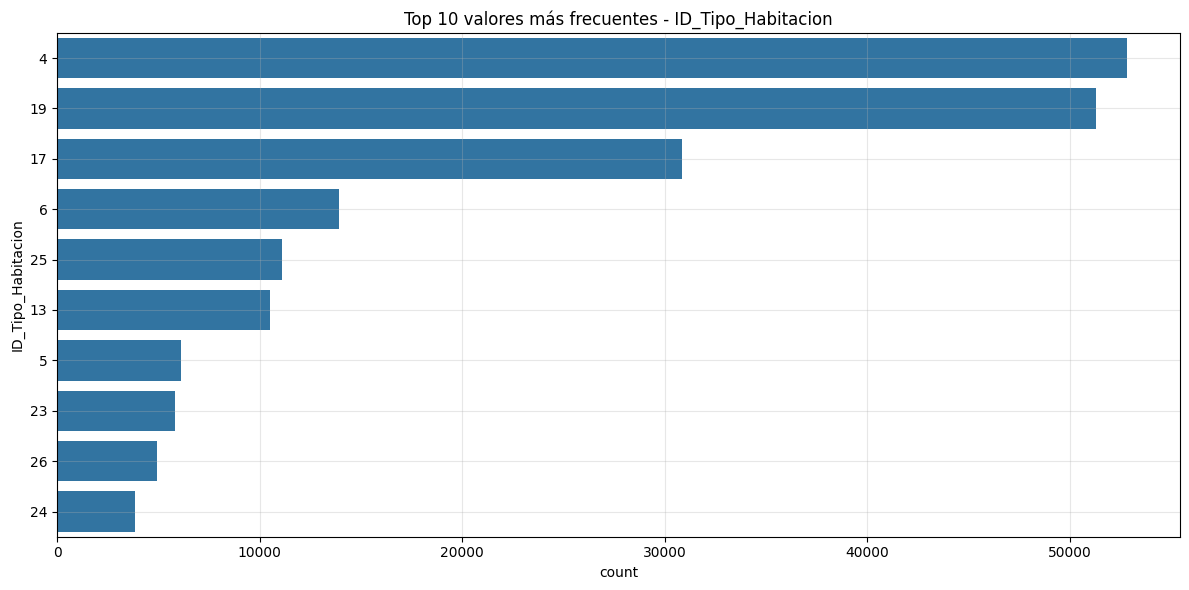


Distribución de ID_canal:
  - Valores únicos: 14
  - Muchos valores únicos (14). Mostrando los 10 más frecuentes:
ID_canal
1     82255
4     80877
10    19743
7      6805
0      6378
8      2225
13     1960
9      1092
5       896
11      347
Name: count, dtype: int64


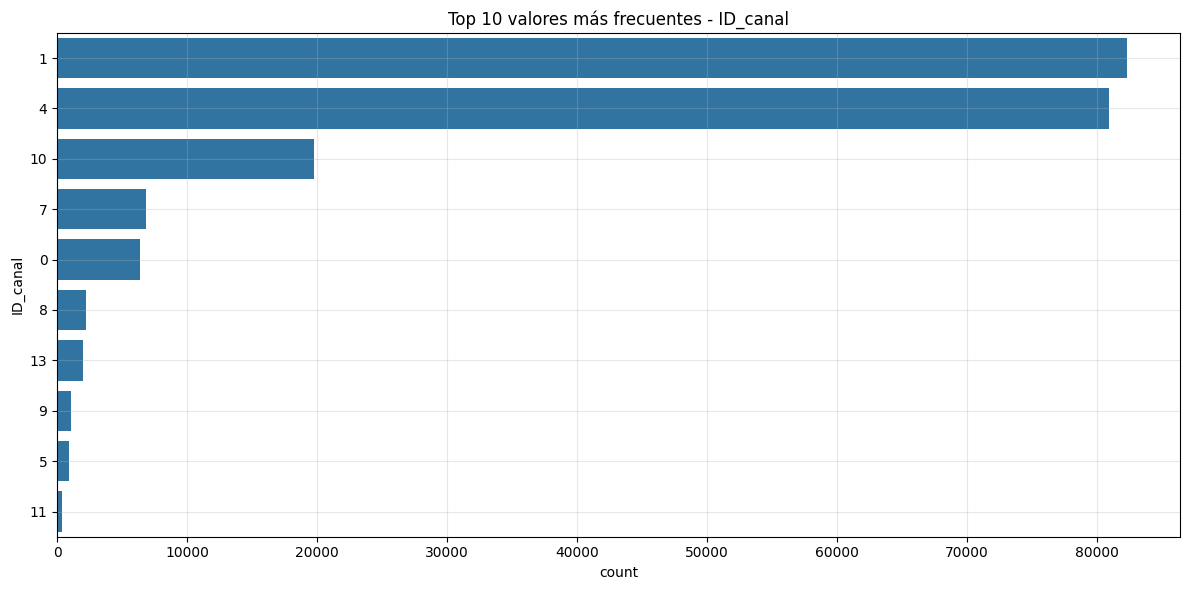


Distribución de ID_estatus_reservaciones:
  - Valores únicos: 8
  - Muchos valores únicos (8). Mostrando los 10 más frecuentes:
ID_estatus_reservaciones
9    131069
2     33301
5     18880
1     17158
3      1854
4       586
8       130
7        24
Name: count, dtype: int64


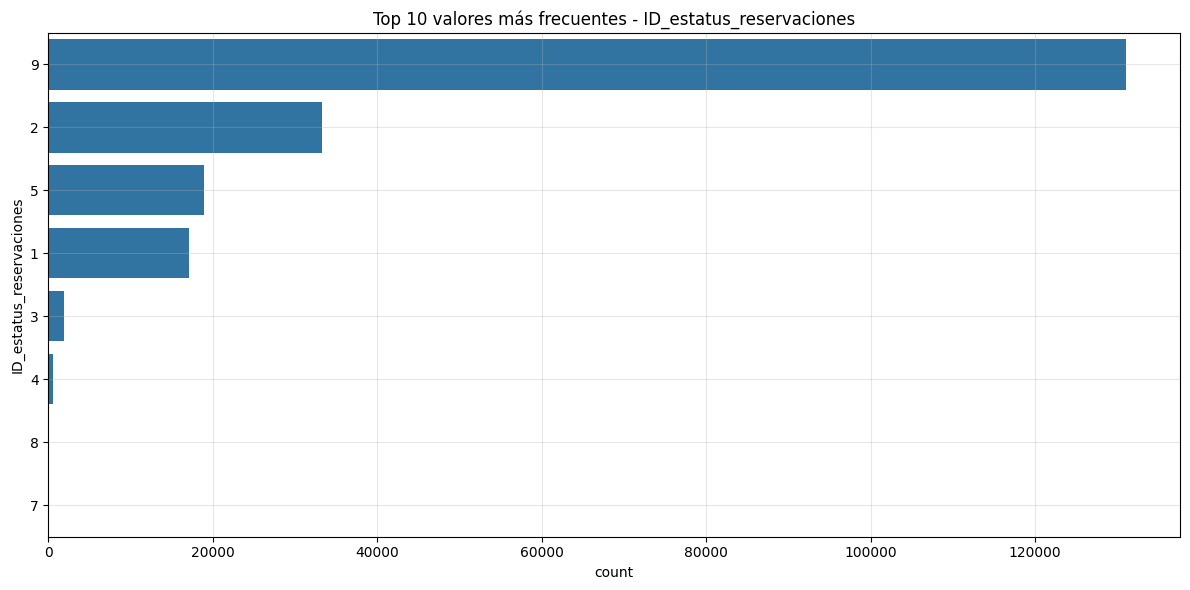

In [ ]:

# Seleccionar columnas categóricas para analizar

columnas_categoricas_analizar = ["ID_Agencia", "ID_Programa", "ID_empresa", "ID_Pais_Origen", "ID_Paquete", "ID_Reserva", "ID_Segmento_Comp", "ID_Tipo_Habitacion", "ID_canal", "ID_estatus_reservaciones"]


for col in columnas_categoricas_analizar:
    # Contar valores únicos
    valor_counts = df_analisis[col].value_counts()
    n_unique = len(valor_counts)
    
    print(f"\nDistribución de {col}:")
    print(f"  - Valores únicos: {n_unique}")
    

    print(f"  - Muchos valores únicos ({n_unique}). Mostrando los 10 más frecuentes:")
    print(valor_counts.head(10))
    
    # Gráfico de barras para los 10 valores más frecuentes
    plt.figure(figsize=(12, 6))
    sns.countplot(y=col, data=df_analisis, 
                    order=df_analisis[col].value_counts().head(10).index)
    plt.title(f'Top 10 valores más frecuentes - {col}')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()



# Análisis de variable temporales

In [ ]:
# Identificar y convertir columnas de fecha
columnas_fecha_potenciales = [col for col in df_analisis.columns if 'fec' in col.lower() or 'date' in col.lower()]
print(f"Columnas potenciales de fecha detectadas: {len(columnas_fecha_potenciales)}")

fechas_convertidas = []
for col in columnas_fecha_potenciales:
    try:
        if df_analisis[col].dtype != 'datetime64[ns]':
            df_analisis[col] = pd.to_datetime(df_analisis[col], errors='coerce')
            print(f"Columna {col} convertida a datetime")
        fechas_convertidas.append(col)
    except:
        print(f"No se pudo convertir {col} a datetime")

Columnas potenciales de fecha detectadas: 5


### Análisis con la variable FECHA: h_fec_sda_okt

In [ ]:
# Seleccionar la primera columna de fecha convertida para el análisis
fecha_analisis = fechas_convertidas[0]

# Eliminar filas con fechas nulas para este análisis
df_fechas = df_analisis.dropna(subset=[fecha_analisis])

print(f"\nAnálisis temporal basado en: {fecha_analisis}")


Análisis temporal basado en: h_fec_sda_ok


In [ ]:
# Extraer componentes de fecha
df_fechas['año'] = df_fechas[fecha_analisis].dt.year
df_fechas['mes'] = df_fechas[fecha_analisis].dt.month
df_fechas['dia'] = df_fechas[fecha_analisis].dt.day
df_fechas['dia_semana'] = df_fechas[fecha_analisis].dt.day_name()


Distribución por año:
año
2000        34
2019    131512
2020     70437
2021      1019
Name: count, dtype: int64


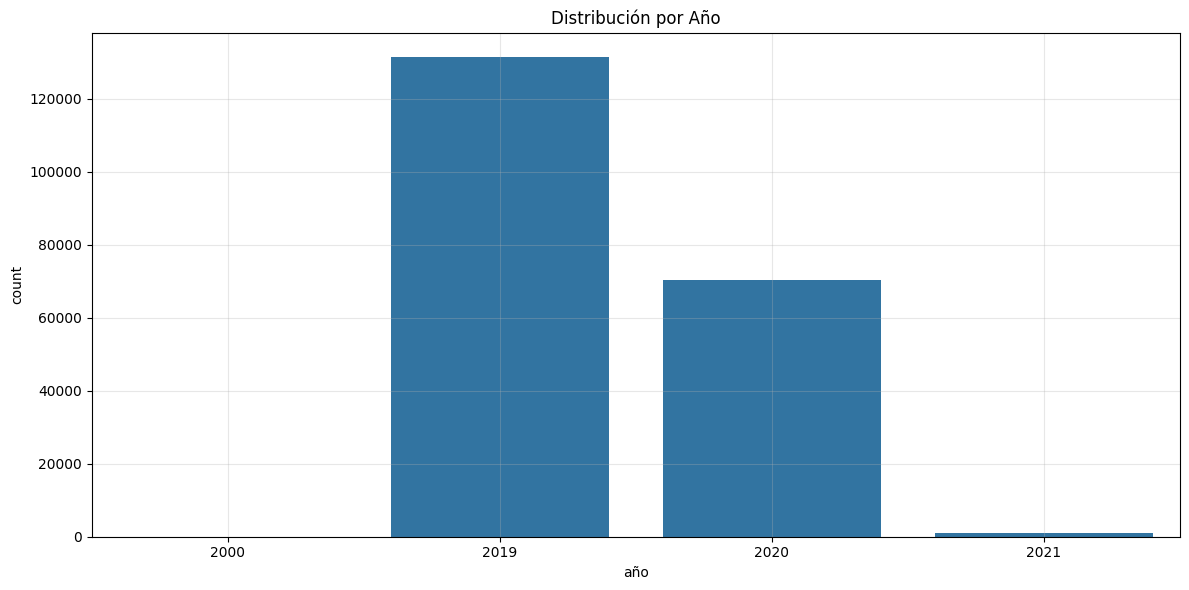

In [ ]:
# Análisis por año
print("\nDistribución por año:")
year_counts = df_fechas['año'].value_counts().sort_index()
print(year_counts)

plt.figure(figsize=(12, 6))
sns.countplot(x='año', data=df_fechas, order=sorted(df_fechas['año'].unique()))
plt.title('Distribución por Año')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


Distribución por mes:
mes
1 - Enero         12162
2 - Febrero       15273
3 - Marzo         22207
4 - Abril         16380
5 - Mayo          22250
6 - Junio         18228
7 - Julio         16862
8 - Agosto        14170
9 - Septiembre    16079
10 - Octubre      16058
11 - Noviembre    18073
12 - Diciembre    15260
Name: count, dtype: int64


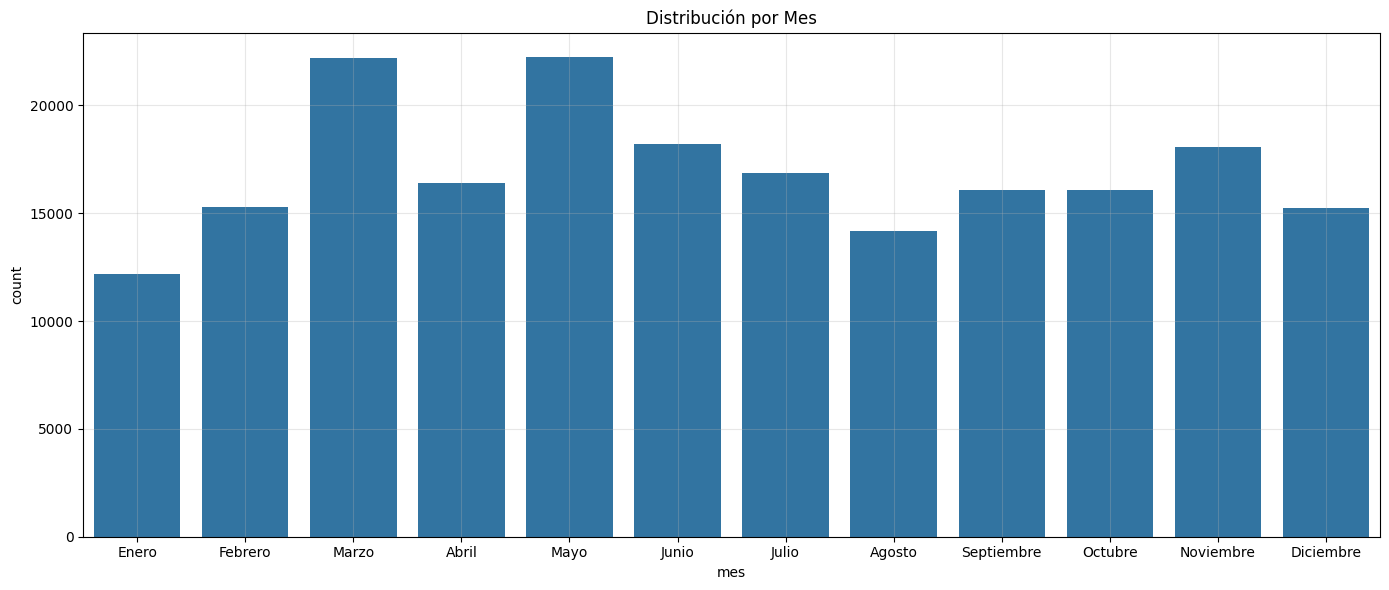

In [ ]:
# Análisis por mes
print("\nDistribución por mes:")
month_counts = df_fechas['mes'].value_counts().sort_index()
month_names = {
    1: 'Enero', 2: 'Febrero', 3: 'Marzo', 4: 'Abril', 5: 'Mayo', 6: 'Junio',
    7: 'Julio', 8: 'Agosto', 9: 'Septiembre', 10: 'Octubre', 11: 'Noviembre', 12: 'Diciembre'
}
month_counts.index = month_counts.index.map(lambda x: f"{x} - {month_names.get(x, '')}")
print(month_counts)

plt.figure(figsize=(14, 6))
sns.countplot(x='mes', data=df_fechas, order=sorted(df_fechas['mes'].unique()))
plt.xticks(range(12), [month_names.get(i, i) for i in range(1, 13)])
plt.title('Distribución por Mes')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()



Distribución por día de la semana:
dia_semana
Monday - Lunes           19625
Tuesday - Martes         12689
Wednesday - Miércoles    22047
Thursday - Jueves        37623
Friday - Viernes         16355
Saturday - Sábado        23964
Sunday - Domingo         70699
Name: count, dtype: int64


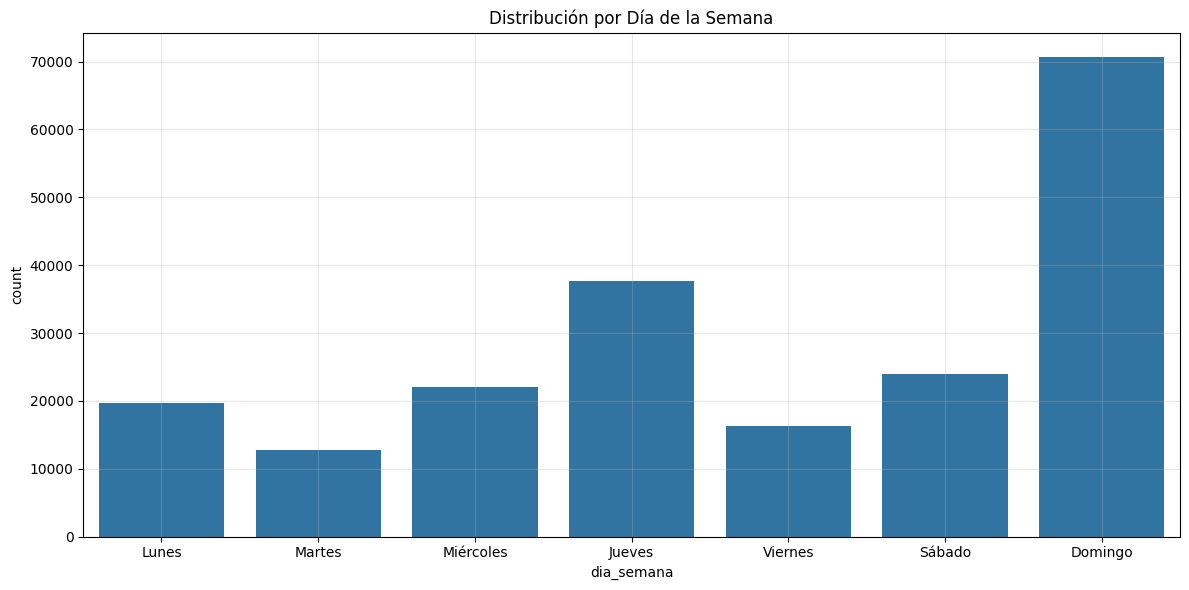

In [ ]:
# Análisis por día de la semana
print("\nDistribución por día de la semana:")
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_names = {
    'Monday': 'Lunes', 'Tuesday': 'Martes', 'Wednesday': 'Miércoles', 
    'Thursday': 'Jueves', 'Friday': 'Viernes', 'Saturday': 'Sábado', 'Sunday': 'Domingo'
}

weekday_counts = df_fechas['dia_semana'].value_counts().reindex(weekday_order)
weekday_counts.index = weekday_counts.index.map(lambda x: f"{x} - {weekday_names.get(x, '')}")
print(weekday_counts)

plt.figure(figsize=(12, 6))
sns.countplot(x='dia_semana', data=df_fechas, 
                order=weekday_order)
plt.xticks(range(7), [weekday_names.get(day, day) for day in weekday_order])
plt.title('Distribución por Día de la Semana')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

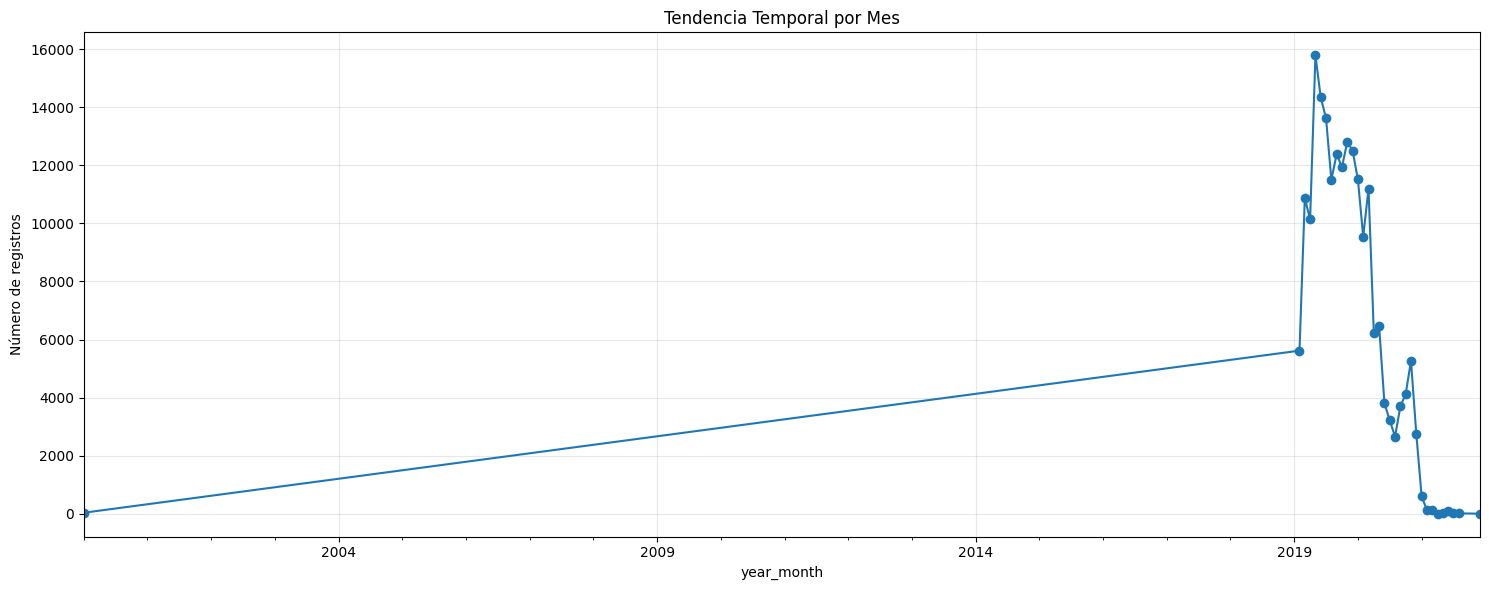

In [ ]:
# Tendencia temporal

# Agrupar por año y mes
df_fechas['year_month'] = df_fechas[fecha_analisis].dt.to_period('M')
temporal_trend = df_fechas.groupby('year_month').size()

plt.figure(figsize=(15, 6))
temporal_trend.plot(kind='line', marker='o')
plt.title('Tendencia Temporal por Mes')
plt.ylabel('Número de registros')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

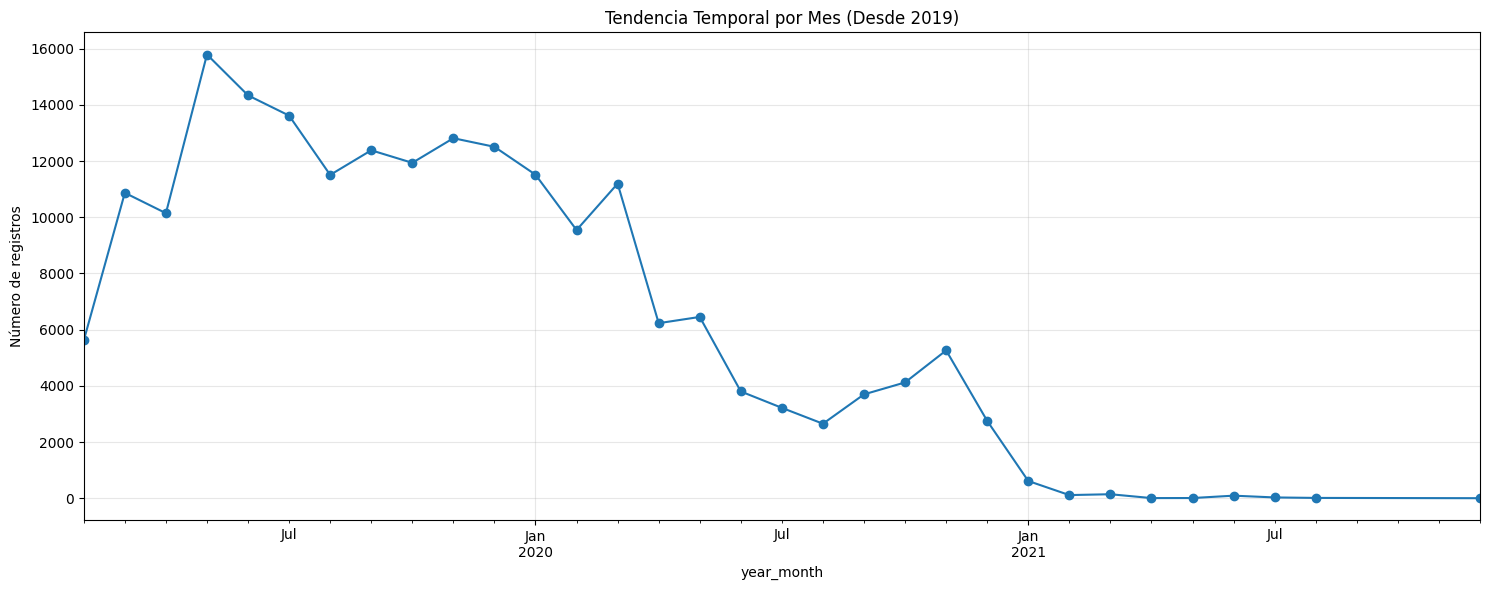

In [ ]:
# Visualizar para datos a partir de 2019
df_fechas_filtrado = df_fechas[df_fechas[fecha_analisis].dt.year >= 2019]

# Continuar con el análisis de tendencia temporal
# Agrupar por año y mes
df_fechas_filtrado['year_month'] = df_fechas_filtrado[fecha_analisis].dt.to_period('M')
temporal_trend = df_fechas_filtrado.groupby('year_month').size()

plt.figure(figsize=(15, 6))
temporal_trend.plot(kind='line', marker='o')
plt.title('Tendencia Temporal por Mes (Desde 2019)')
plt.ylabel('Número de registros')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()
